# Evaluation of ML Models

### Agenda
<ol>
  <li>Hypotheses, p-values</li>
  <li>Confusion matrix, accuracy measures</li>
  <li>Precision-recall tradeoff</li>
  <li>ROC curve construction</li>
  <li>ML Models test</li>
</ol> 

## Hypothesis testing

### Example study  
Let’s look at a simple example. The table below shows the salaries of Data Engineers and Analysts:  

| ID/Position | Engineer | Analyst |
|-------------|----------|---------|
| 1           | 2300     | 2200    |
| 2           | 2100     | 2600    |
| 3           | 3000     | 2800    |
| 4           | 3200     | 2800    |
| 5           | 2400     | 2600    |
| 6           | 1900     | 2200    |
| 7           | 1800     | 1700    |
| **MEAN**    | **2592** | **2414** |

At first glance, we see that the **mean salary of Engineers (2592)** is higher than that of Analysts (2414).  
But can we really conclude that *Engineers tend to earn more than Analysts*?  

Notice that in some cases the Analyst salary is actually higher, and the two largest Engineer salaries may heavily influence the average.  

This raises the key question:  
➡️ *Is the observed difference due to random chance in this sample, or does it represent a real, statistically significant difference in salaries?*  

***

This is exactly where **hypothesis testing** comes into play.  
It helps us decide whether the differences we observe in data are due to random chance or represent a real effect.  

We set **Null Hypothesis (H₀)** and **Alternative Hypothesis (H₁)**

There are three main types of hypothesis tests, depending on the research question:  

**Two-sided (two-tailed):**  
- H₀: X = 20  
- H₁: X ≠ 20  
➡️ Example: *Average age of 1st-year bachelor’s students is 20 (H₀) vs. it is different from 20 (H₁).*  

**Left-tailed:**  
- H₀: X = 2000  
- H₁: X < 2000  
➡️ Example: *Average income of teachers is 2000 (H₀) vs. it is less than 2000 (H₁).*  

**Right-tailed:**  
- H₀: X = 2  
- H₁: X > 2  
➡️ Example: *Office workers drink 2 coffees a day on average (H₀) vs. they drink more than 2 (H₁).*  



### T-test

**T-test is** a statistical tool used to compare the means of two groups, or the mean of one group against a known value, **to determine if the differences observed are statistically significant and not** just due to chance. There are three main types of t-tests: 
- The one-sample t-test 
- The independent-samples t-test (for two different groups)
- The paired-samples t-test (for two measurements on the same group). 
To test these hypotheses, we will use a t-test for independent samples. 
The formula we'll use is:

$$
t = \frac{\bar{X}_{\text{1}} - \bar{X}_{\text{2}}}{\sqrt{\frac{s^2_{\text{1}}}{n_{\text{1}}} + \frac{s^2_{\text{2}}}{n_{\text{2}}}}}
$$


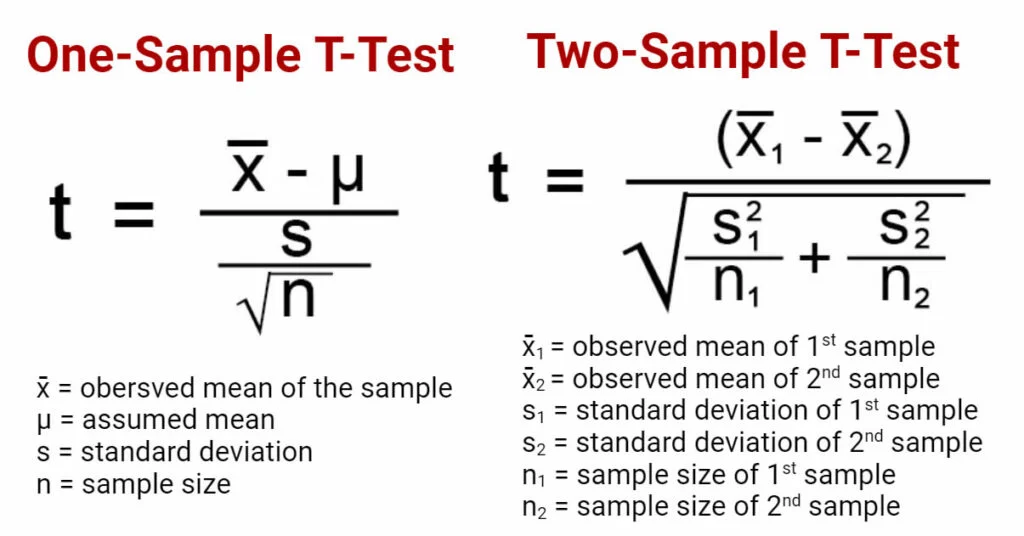

### Code exercise
In this session, we'll apply the **t-test** to the *Data Engineers vs. Analysts* salary example.  
The goal is to determine whether the difference in their salaries is **statistically significant** or simply due to chance.  
We will also experiment by modifying the dataset slightly to observe how changes affect the outcome of the t-test.


Below we import the necessary libraries containing the Python functions we need.  
We use **pandas** and **numpy** for data handling, utilities from **scikit-learn (sklearn)** for easier statistical testing, **seaborn** and **matplotlib**for visualization and utils from **ipywidget** for dynamic visualisation with sliders.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import FloatSlider, IntSlider, VBox, interactive_output



First, let's add data into numpy arrays, print and visualize basic information about the data.

Number of Engineers: 7 	 Average salary of Engineer: 2600 	 St. Deviation of Engineers salary: 374
Number of Analyst: 7 	 Average salary of Analyst: 2414 	 St. Deviation of Analysts salary: 372


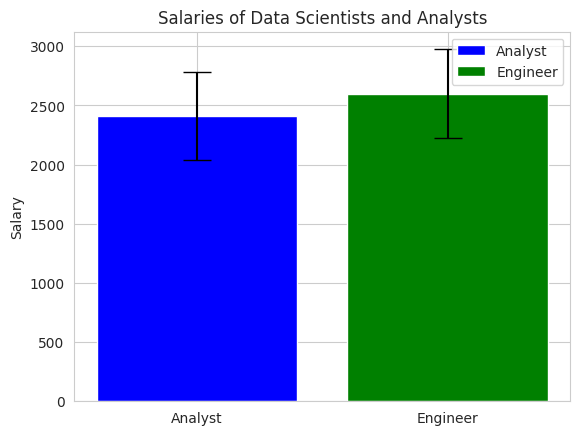

In [81]:
eng = [2300, 2100, 3000, 3200, 2400, 2400, 2800]
analyst = [2200, 2600, 2800, 2800, 2600, 2200, 1700]

print('Number of Engineers:', len(eng),'\t Average salary of Engineer:', round(np.mean(eng)), '\t St. Deviation of Engineers salary:', round(np.std(eng)))
print('Number of Analyst:', len(analyst),'\t Average salary of Analyst:', round(np.mean(analyst)), '\t St. Deviation of Analysts salary:', round(np.std(analyst)))


# Means
mean_engineer_salary = np.mean(eng)
mean_analyst_salary = np.mean(analyst)

# Standard deviations
std_engineer_salary = np.std(eng)
std_analyst_salary = np.std(analyst)

# Plot with error bars
plt.bar([0], [mean_analyst_salary], yerr=[std_analyst_salary], color='b', capsize=10, label='Analyst')
plt.bar([1], [mean_engineer_salary], yerr=[std_engineer_salary], color='g', capsize=10, label='Engineer')

# Labels and titles
plt.xticks([0, 1], ['Analyst', 'Engineer'])
plt.ylabel('Salary')
plt.title('Salaries of Data Scientists and Analysts')

plt.legend()
plt.grid(True)
plt.show()

**ttest_ind** method from scipy.stats performs t-test automatically and returns p-value and t-statistic automatically.

For more information about method check [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).

In [82]:
# Perform one-sided t-test (engineer salaries > analyst salaries)
t_stat, p_value = ttest_ind(eng, analyst, alternative='greater', equal_var=True)

# Print the p-value
print(f"P-value: {p_value:.4f}")
print(f"T-statistic: {t_stat:.4f}")

# Check the result at the 5% significance level (95% confidence)
if p_value < 0.05:
    print("Reject the null hypothesis: Engineers' salaries are significantly greater than Analysts' salaries at the 5% significance level.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that Engineers' salaries are greater than Analysts' salaries at the 5% significance level.")


P-value: 0.2027
T-statistic: 0.8622
Fail to reject the null hypothesis: No significant evidence that Engineers' salaries are greater than Analysts' salaries at the 5% significance level.


### Hand calculate of T-test
To better understand how the t-test works, let’s manually calculate the t-statistic using **NumPy** methods.
To remind the formula for the t-statistic is:

$$
t = \frac{\bar{X}_{\text{1}} - \bar{X}_{\text{2}}}{\sqrt{\frac{s^2_{\text{1}}}{n_{\text{1}}} + \frac{s^2_{\text{2}}}{n_{\text{2}}}}}
$$


In [83]:
### Calculate t-test by hand

# Calculate the mean of each group
mean_eng = np.mean(eng)
mean_analyst = np.mean(analyst)


std_eng = np.std(eng)
std_analyst = np.std(analyst)

n_eng = len(eng)
n_analyst = len(analyst)

t_stat = (mean_eng - mean_analyst) / np.sqrt((std_eng**2 / n_eng) + (std_analyst**2 / n_analyst))
print(f"T-statistic: {t_stat}")

T-statistic: 0.9312905308151287


If we compare this t-statistic with the result from `ttest_ind` method, we notice a difference.  
This is because of the parameter **ddof** (degrees of freedom) used in standard deviation calculation.  

- By default, `np.std` uses `ddof=0`, which computes the **population** standard deviation.  
- In our case, we are working with a **sample**, so we should use `ddof=1` to compute the **sample** standard deviation.  

That’s why `scipy` (which assumes sample standard deviation by default) gives a different result.  

If we set `ddof=1` in our manual calculation, we will obtain the same t-statistic as scipy method.


In [84]:
std_eng = np.std(eng, ddof=1)
std_analyst = np.std(analyst, ddof=1)

t_stat = (mean_eng - mean_analyst) / np.sqrt((std_eng**2 / n_eng) + (std_analyst**2 / n_analyst))
print(f"T-statistic: {t_stat}")

T-statistic: 0.862207492156495


**Extending dataset** <br>
Now, let's try to extend the number of samples by duplicating samples.

Extended Engineer Salaries: [2300, 2100, 3000, 3200, 2400, 2400, 2800, 2300, 2100, 3000, 3200, 2400, 2400, 2800]
Extended Analyst Salaries: [2200, 2600, 2800, 2800, 2600, 2200, 1700, 2200, 2600, 2800, 2800, 2600, 2200, 1700]
Number of Engineers: 14 	 Average salary of Engineer: 2600 	 St. Deviation of Engineers salary: 374
Number of Analyst: 14 	 Average salary of Analyst: 2414 	 St. Deviation of Analysts salary: 372


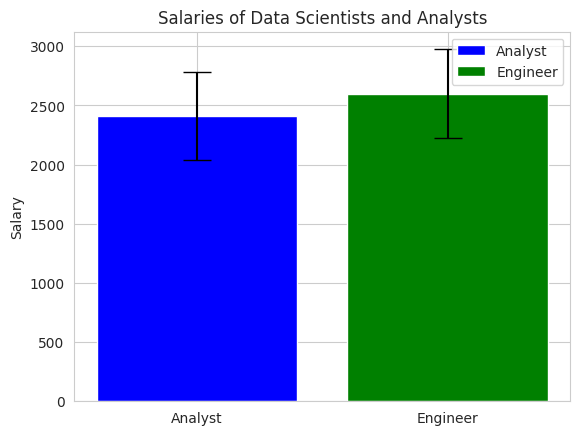

In [85]:
eng_extended = eng*2
analyst_extended = analyst*2

print(f'Extended Engineer Salaries: {eng_extended}')
print(f'Extended Analyst Salaries: {analyst_extended}')
print(150*'=')

print('Number of Engineers:', len(eng_extended),'\t Average salary of Engineer:', round(np.mean(eng_extended)), '\t St. Deviation of Engineers salary:', round(np.std(eng_extended)))
print('Number of Analyst:', len(analyst_extended),'\t Average salary of Analyst:', round(np.mean(analyst_extended)), '\t St. Deviation of Analysts salary:', round(np.std(analyst_extended)))

# Means
mean_engineer_salary = np.mean(eng_extended)
mean_analyst_salary = np.mean(analyst_extended)

# Standard deviations
std_engineer_salary = np.std(eng_extended)
std_analyst_salary = np.std(analyst_extended)

# Plot with error bars
plt.bar([0], [mean_analyst_salary], yerr=[std_analyst_salary], color='b', capsize=10, label='Analyst')
plt.bar([1], [mean_engineer_salary], yerr=[std_engineer_salary], color='g', capsize=10, label='Engineer')

# Labels and titles
plt.xticks([0, 1], ['Analyst', 'Engineer'])
plt.ylabel('Salary')
plt.title('Salaries of Data Scientists and Analysts')

plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Perform one-sided t-test (engineer salaries > analyst salaries)
t_stat, p_value = ttest_ind(eng_extended, analyst_extended, alternative='greater', equal_var=True)

# Print the p-value
print(f"P-value: {p_value:.4f}")
print(f"T-statistic: {t_stat:.4f}")

# Check the result at the 5% significance level (95% confidence)
if p_value < 0.05:
    print("Reject the null hypothesis: Engineers' salaries are significantly greater than Analysts' salaries at the 5% significance level.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that Engineers' salaries are greater than Analysts' salaries at the 5% significance level.")

P-value: 0.1078
T-statistic: 1.2691
Fail to reject the null hypothesis: No significant evidence that Engineers' salaries are greater than Analysts' salaries at the 5% significance level.


**Salary increase** <br>
Let's increase the salaries of engineers and check if the difference in salaries after increasing the salaries of data engineers is statistically significant.

Extended Engineer Salaries: [2550, 2350, 3250, 3450, 2650, 2650, 3050, 2550, 2350, 3250, 3450, 2650, 2650, 3050]
Extended Analyst Salaries: [2200, 2600, 2800, 2800, 2600, 2200, 1700, 2200, 2600, 2800, 2800, 2600, 2200, 1700]
Number of Engineers: 14 	 Average salary of Engineer: 2850 	 St. Deviation of Engineers salary: 374
Number of Analyst: 14 	 Average salary of Analyst: 2414 	 St. Deviation of Analysts salary: 372


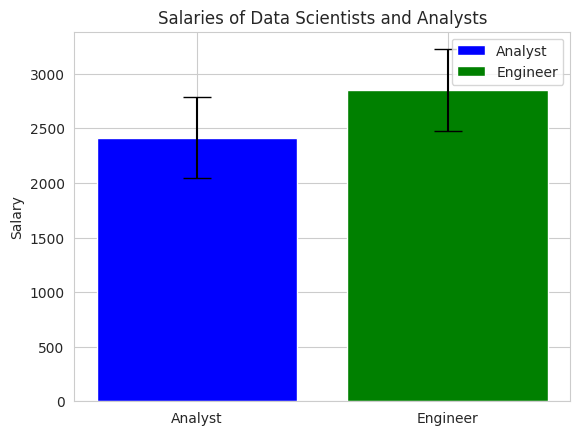

In [87]:
eng_extended_increased = [x + 250 for x in eng_extended]


print(f'Extended Engineer Salaries: {eng_extended_increased}')
print(f'Extended Analyst Salaries: {analyst_extended}')
print(150*'=')

print('Number of Engineers:', len(eng_extended_increased),'\t Average salary of Engineer:', round(np.mean(eng_extended_increased)), '\t St. Deviation of Engineers salary:', round(np.std(eng_extended_increased)))
print('Number of Analyst:', len(analyst_extended),'\t Average salary of Analyst:', round(np.mean(analyst_extended)), '\t St. Deviation of Analysts salary:', round(np.std(analyst_extended)))

# Means
mean_engineer_salary = np.mean(eng_extended_increased)
mean_analyst_salary = np.mean(analyst_extended)

# Standard deviations
std_engineer_salary = np.std(eng_extended_increased)
std_analyst_salary = np.std(analyst_extended)

# Plot with error bars
plt.bar([0], [mean_analyst_salary], yerr=[std_analyst_salary], color='b', capsize=10, label='Analyst')
plt.bar([1], [mean_engineer_salary], yerr=[std_engineer_salary], color='g', capsize=10, label='Engineer')

# Labels and titles
plt.xticks([0, 1], ['Analyst', 'Engineer'])
plt.ylabel('Salary')
plt.title('Salaries of Data Scientists and Analysts')

plt.legend()
plt.grid(True)
plt.show()

In [88]:
# Perform one-sided t-test (engineer salaries > analyst salaries)
t_stat, p_value = ttest_ind(eng_extended_increased, analyst_extended, alternative='greater', equal_var=True)

# Print the p-value
print(f"P-value: {p_value:.4f}")

# Check the result at the 5% significance level (95% confidence)
if p_value < 0.05:
    print("Reject the null hypothesis: Engineers' salaries are significantly greater than Analysts' salaries at the 5% significance level.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that Engineers' salaries are greater than Analysts' salaries at the 5% significance level.")


P-value: 0.0031
Reject the null hypothesis: Engineers' salaries are significantly greater than Analysts' salaries at the 5% significance level.


Finally, after increasing the salaries of engineers, we were able to get a statistically significant difference between salaries.

### Interactive widget to play around with T-test
Below, we use ipywidget methods to create an interactive environment. When the position of sliders changes t_test_interactive method gets re-executed with new values from sliders.

In [107]:

# Define a function to calculate the t-test and display the results
def t_test_interactive(mean1, std_dev1, n1, mean2, std_dev2, n2, alpha=0.05):

    t_stat, p_value = stats.ttest_ind_from_stats(mean1, std_dev1, n1, mean2, std_dev2, n2, equal_var=False, alternative='greater')
    # Display the results
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Conclusion: Reject the null hypothesis (H₀).")
    else:
        print("Conclusion: Fail to reject the null hypothesis (H₀).")

    df = n1 + n2 - 2
    # Plot a t-distribution curve
    x = np.linspace(-4, 4, 500)
    y = stats.t.pdf(x, df)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f"t-distribution (df={df:.2f})")
    plt.axvline(x=t_stat, color='red', linestyle='--', label=f"T-statistic = {t_stat:.2f}")
    plt.fill_between(x, 0, y, where=(x >= t_stat), color='red', alpha=0.5, label='p-value area')
    plt.title("T-distribution - Right-tailed test")
    plt.xlabel("t")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Create interactive widgets
mean1_slider = widgets.FloatSlider(min=2000, max=3000, step=10, value=2500, description='Mean 1')
std_dev1_slider = widgets.FloatSlider(min=1, max=1000, step=1, value=500, description='Std Dev 1')
n1_slider = widgets.IntSlider(min=2, max=50, step=1, value=30, description='Sample Size 1')

mean2_slider = widgets.FloatSlider(min=2000, max=3000, step=10, value=45, description='Mean 2')
std_dev2_slider = widgets.FloatSlider(min=1, max=1000, step=1, value=500, description='Std Dev 2')
n2_slider = widgets.IntSlider(min=2, max=50, step=1, value=30, description='Sample Size 2')

# Link widgets with the function
ui = widgets.VBox([mean1_slider, std_dev1_slider, n1_slider, mean2_slider, std_dev2_slider, n2_slider])
output = widgets.interactive_output(t_test_interactive, {'mean1': mean1_slider, 'std_dev1': std_dev1_slider, 'n1': n1_slider,
                                                        'mean2': mean2_slider, 'std_dev2': std_dev2_slider, 'n2': n2_slider})


display(ui, output)

Output()

## Confusiom matrices, ROC, AUC

### Example Study

Imagine we have predictions from a model that estimates whether a day will be sunny or not. The model outputs probabilities,the higher the probability, the more likely it predicts a sunny day.  

| Day | Probability (Sunny) |
|-----|----------------------|
| 1   | 0.40                |
| 2   | 0.60                |
| ... | ...                 |
| 30  | 0.95                |


But here comes the question: **how do we set the threshold?**  
- If we use a **low threshold** (e.g., go outside even with a small probability of sunshine), we’ll catch most sunny days—but also end up going out on many rainy days.  
- If we use a **high threshold** (e.g., only go outside when the model is very sure), we’ll avoid most rainy days—but also miss many sunny ones.  

This illustrates the **precision–recall trade-off**, which can be visualized with a **confusion matrix** and its related metrics. 


|                | **Predicted Positive** | **Predicted Negative** |
|----------------|-------------------------|-------------------------|
| **Actual Positive** | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative** | False Positive (FP)     | True Negative (TN)      |


- **Precision**:  
Precision = TP/(TP + FP)


- **Recall** :  
Recall = TP/(TP + FN)

---
However, confusion matrices depend on the chosen threshold. So, how can we evaluate a model in a way that is independent of the threshold?  

That’s where the **ROC curve** (Receiver Operating Characteristic curve) and the **AUC score** (Area Under the Curve) come in. They provide a more universal way to measure how well a model distinguishes between classes, regardless of the threshold.  


### Code exercise
Luckily, most of the metrics used nowadays are already implemented in scipy.metrics library.

To see the other metrics implemented in scipy.metrics check the [documentation](https://scikit-learn.org/stable/api/sklearn.metrics.html).

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

First, we create 30 random values between 0 and 1 to represent predicted probabilities in our example case.


In [ ]:
## pred_prob with random number between 0 to 1 and lenght of 30
np.random.seed(0)
pred_prob = np.random.rand(30)
pred_prob


array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194])

Next, we add some noise to these predictions and use them to generate a simple set of ground truth labels.  

*(Note: the value 0.5 here is **not** a decision threshold,it’s just used to create the ground truth for demonstration purposes.)*


In [93]:
prob_with_noise = pred_prob + np.random.normal(0, 0.3, 30)
prob_with_noise

## Sunny is where prob_with_noise is greater than 0.5
sunny = prob_with_noise > 0.5
sunny

array([ True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False,  True])

### Experimenting with threshold
The interactive environment below lets us adjust the **threshold** and observe how it affects the model.  
For each threshold value, it calculates **accuracy**, **precision**, and **recall**, and also displays the corresponding **confusion matrix**.


In [94]:
from sklearn.metrics import confusion_matrix

In [ ]:
def sunny_rainy_interactive(threshold):
    # Apply threshold
    pred = pred_prob > threshold

    # Confusion matrix
    cm = confusion_matrix(sunny, pred, labels=[True, False])
    
    # Calculate metrics
    accuracy = accuracy_score(sunny, pred)
    precision = precision_score(sunny, pred)
    recall = recall_score(sunny, pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sunny', 'Rainy'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix (threshold = {threshold:.2f})")
    plt.show()


# Slider from 0.0 to 1.0
threshold_slider = widgets.FloatSlider(
    min=0.0, max=1.0, step=0.01, value=0.5, description='Threshold'
)

ui = widgets.VBox([threshold_slider])
output = widgets.interactive_output(
    sunny_rainy_interactive, {'threshold': threshold_slider}
)

display(ui, output)


Output()

### Roc curve and AUC

In this step, we evaluate our model using the **ROC curve** and the **AUC score**.  

- The **AUC (Area Under the Curve)** gives a single number that summarizes the model’s ability to distinguish between classes.  
  - A value of **0.5** means the model is no better than random guessing.  
  - A value of **1.0** means perfect separation between classes.  

- The **ROC curve** (Receiver Operating Characteristic curve) plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** across all possible thresholds.  
  - This helps us visualize the trade-off between sensitivity and false alarms without committing to a single threshold.  

The code calculates the AUC, computes FPR and TPR values, and then plots the ROC curve to illustrate the model’s overall performance.  

In our code, the length of `thresholds` is **14** because it corresponds to the **number of unique predicted probability values** in our dataset (plus one extra point for the ROC calculation).  

In [1]:
### Construct ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Calculate AUC
auc = roc_auc_score(sunny, pred_prob)
print(f"AUC: {auc:.2f}")

fpr, tpr, thresholds = roc_curve(sunny, pred_prob)
print('Generated thresholds:' ,len(thresholds))

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, marker='o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()




NameError: name 'sunny' is not defined

In this step, we pick one specific index from the results of `roc_curve` to take a closer look.  
By selecting `ind = 12`, we can examine:  

- The **threshold** value at that point.  
- The corresponding **False Positive Rate (FPR)**.  
- The corresponding **True Positive Rate (TPR)**.  

This helps us see how changing the threshold affects the trade-off between catching more positive cases (higher TPR) and avoiding false alarms (lower FPR).  


In [102]:
ind = 12

print('Threshold:', round(thresholds[ind],2))
print('False positive:', round(fpr[ind],2))
print('True positive:', round(tpr[ind],2))

Threshold: 0.41
False positive: 0.62
True positive: 1.0


### Experimenting with TP,FP,TN,FN
The interactive environment below lets us adjust the `TP,FP,TN,FN` and observe how it affects the confusion matrix.  
For each set of values, it calculates **accuracy**, **precision**, and **recall**, and also displays the corresponding **confusion matrix**.


In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Create an Output widget to display text
output_area = widgets.Output()

# Create an Output widget to display text
output_area = widgets.Output()

def calculate_metrics(tp, tn, fp, fn):
    with output_area:
        # Clear previous output
        output_area.clear_output()

        # Convert confusion matrix values to numpy array
        confusion_matrix = np.array([[tp, fp], [fn, tn]])

        # Calculate metrics
        y_true = [0]*(tn+fp) + [1]*(fn+tp)
        y_pred = [0]*tn + [1]*fp + [0]*fn + [1]*tp

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        # Display metrics
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")

        # Plot confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Negative', 'Positive'])
        fig, ax = plt.subplots(figsize=(8, 6))
        disp.plot(ax=ax, cmap='Blues', values_format='d')
        plt.title("Confusion Matrix")
        plt.show()


# Create interactive widgets for confusion matrix values with full names
tp_slider = widgets.IntSlider(min=0, max=100, step=1, value=10, description='True Positives (TP):', style={'description_width': 'initial'})
tn_slider = widgets.IntSlider(min=0, max=100, step=1, value=50, description='True Negatives (TN):', style={'description_width': 'initial'})
fp_slider = widgets.IntSlider(min=0, max=100, step=1, value=5, description='False Positives (FP):', style={'description_width': 'initial'})
fn_slider = widgets.IntSlider(min=0, max=100, step=1, value=15, description='False Negatives (FN):', style={'description_width': 'initial'})

# Arrange sliders in a horizontal layout and ensure they fit
sliders = widgets.HBox([tp_slider, tn_slider, fp_slider, fn_slider])
ui = widgets.VBox([sliders])

# Link widgets with the function
output = widgets.interactive_output(calculate_metrics, {'tp': tp_slider, 'tn': tn_slider, 'fp': fp_slider, 'fn': fn_slider})


# Display the interactive UI and output area
display(ui, output_area)

Output()